In [1]:
# Data manipulation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt

import seaborn as sns

#### IMPORTING THE DATASET

In [2]:
df = pd.read_csv('sales_data.csv')


# first five rows

df.head()

,Product,Product id,Segmentation,Qty,Sales,Month
0,Peak Yoghurt Dr Plain Sweetened 24x100ml,1155370,ATOM-WS - Lockup Shop (Secondary Town),30,39696.0,1
1,Peak Yoghurt Dr Plain Sweetened 24x100ml,1155370,GTOM-RT - Table Top,4,5292.8,1
2,Peak Yoghurt Dr Plain Sweetened 24x100ml,1155370,GTOM-RT - Table Top,2,2646.4,1
3,Peak Yoghurt Dr Plain Sweetened 24x100ml,1155370,GTOM-RT - Table Top,3,3969.6,1
4,Peak Yoghurt Dr Plain Sweetened 24x100ml,1155370,GTOM-RT - Table Top,10,13232.0,1


In [3]:
# last five rows of the dataset
df.tail()

,Product,Product id,Segmentation,Qty,Sales,Month
62219,Peak 456 GUM Pwdr Pouch 12x360g,1178076,GTNOM-RT - Minimart,1,1348.25,11
62220,Peak 456 GUM Pwdr Pouch 12x360g,1178076,GTNOM-RT - Minimart,1,1348.25,11
62221,Peak 456 GUM Pwdr Pouch 12x360g,1178076,GTNOM-RT - Minimart,1,1348.25,11
62222,Peak 456 GUM Pwdr Pouch 12x360g,1178076,GTNOM-RT - Kiosk,1,1348.25,11
62223,Peak 456 GUM Pwdr Pouch 12x360g,1178076,GTNOM-RT - Minimart,1,1348.25,11


In [4]:
# shape of the dataset

df.shape

(62224, 6)

In [5]:
# columns present in the dataset

df.columns

Index(['Product', 'Product id', 'Segmentation', 'Qty', 'Sales', 'Month'], dtype='object')

In [6]:
# A concise summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62224 entries, 0 to 62223
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       62224 non-null  object 
 1   Product id    62224 non-null  int64  
 2   Segmentation  62224 non-null  object 
 3   Qty           62224 non-null  int64  
 4   Sales         62224 non-null  float64
 5   Month         62224 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB


In [7]:
# checking for missing values

df.isnull().sum()

Product         0
Product id      0
Segmentation    0
Qty             0
Sales           0
Month           0
dtype: int64

In [8]:
# Getting description statistics summary
df.describe()

,Product id,Qty,Sales,Month
count,6.222400e+04,62224.000000,6.222400e+04,62224.000000
mean,2.592445e+06,7.893755,1.451961e+04,5.968437
std,2.587221e+06,19.651899,1.303623e+05,3.366869
min,4.034780e+05,1.000000,3.885000e+01,1.000000
25%,1.176870e+06,1.000000,2.242000e+02,3.000000
50%,1.182533e+06,2.000000,9.549500e+02,6.000000
75%,7.050005e+06,6.000000,3.009210e+03,9.000000
max,7.050593e+06,1200.000000,1.707606e+07,12.000000


### EXPLORATORY DATA ANALYSIS

#### WHAT IS THE OVERALL SALES TRED ?

In [9]:
df['Month'].min()

1

In [10]:
df['Month'].max()

12

In [11]:
df['Month']

0         1
1         1
2         1
3         1
4         1
         ..
62219    11
62220    11
62221    11
62222    11
62223    11
Name: Month, Length: 62224, dtype: int64

In [12]:
df_trend = df.groupby('Month').sum()['Sales'].reset_index()

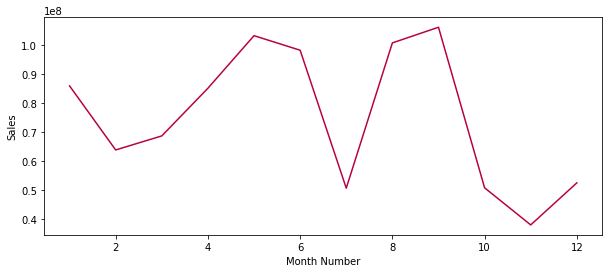

In [13]:
plt.figure(figsize=(10,4))
plt.plot(df_trend['Month'], df_trend['Sales'], color='#b80045')
plt.xlabel('Month Number')
plt.ylabel('Sales')
#plt.grid(True, which='both', color='grey', linewidth=1)
plt.savefig('graph.jpeg')

- <h4> WHICH ARE THE 1O PRODUCTS BY SALES ?

In [14]:
# Grouping product name column
#df['MONTH']=df['MONTH'].str[0:]
df['Month']=df['Month'].astype('int32')
df.head()

,Product,Product id,Segmentation,Qty,Sales,Month
0,Peak Yoghurt Dr Plain Sweetened 24x100ml,1155370,ATOM-WS - Lockup Shop (Secondary Town),30,39696.0,1
1,Peak Yoghurt Dr Plain Sweetened 24x100ml,1155370,GTOM-RT - Table Top,4,5292.8,1
2,Peak Yoghurt Dr Plain Sweetened 24x100ml,1155370,GTOM-RT - Table Top,2,2646.4,1
3,Peak Yoghurt Dr Plain Sweetened 24x100ml,1155370,GTOM-RT - Table Top,3,3969.6,1
4,Peak Yoghurt Dr Plain Sweetened 24x100ml,1155370,GTOM-RT - Table Top,10,13232.0,1


In [15]:
results = df.groupby('Month').sum()
results

,Product id,Qty,Sales
Month,,,
1,17434476923,66458,8.592022e+07
2,18870873128,65275,6.377506e+07
3,19720424924,65514,6.863400e+07
4,16245843382,54461,8.511042e+07
5,19750583314,67731,1.032871e+08
6,14673011895,46113,9.825333e+07
7,10509499685,23464,5.056274e+07
8,14191488744,30865,1.007868e+08
9,3483897408,27867,1.062018e+08


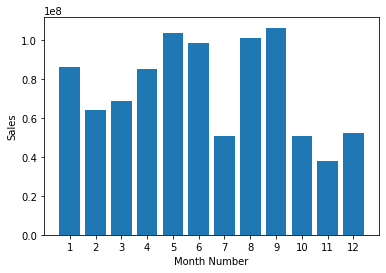

In [16]:
months = range(1,13)
plt.bar(months, results['Sales'])

plt.xticks(months)
plt.xlabel('Month Number')

plt.ylabel('Sales')
plt.show()

In [17]:
#Top 10 Product
result = pd.DataFrame(df.groupby('Product').sum()['Sales'])
SORT = result.sort_values('Sales', ascending=False)  # Sorting in descending order
top_10 = SORT[:10]
top_10

,Sales
Product,
Three Crowns Evm Reg Can 24x150g,2.363825e+08
Peak Pwdr Sac 210x14g,2.247596e+08
Peak Filled Evm Can 24x150g,1.223246e+08
Peak Pwdr Pouch 12x360g,6.868322e+07
Peak Filled Evm Can 48x150g,2.880818e+07
Three Crowns Pwdr Pouch 12x350g,2.633237e+07
Peak 123 GUM Pwdr Pouch 12x360g,2.288563e+07
Three Crowns Pwdr Sac 210x12g,2.213484e+07
My Boy Eldorin Box 12x400g,1.855955e+07


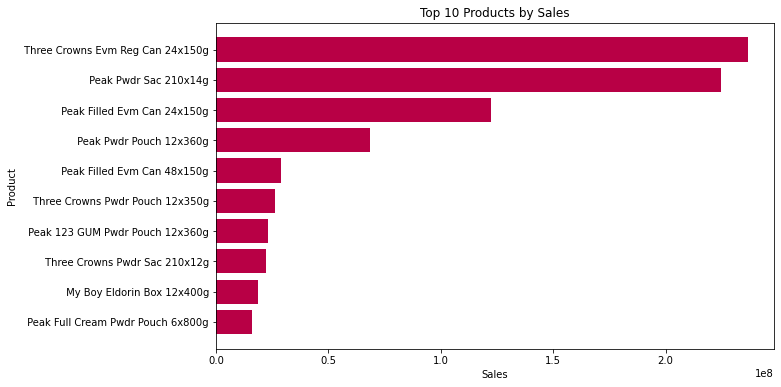

In [18]:
# Plotting the top 10 products
'''plt.figure(figsize=(10, 6))
plt.bar(top_10.index, top_10['Sales'])
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Top 10 Products by Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()'''

plt.figure(figsize=(10, 6))
plt.barh(top_10.index, top_10['Sales'],color='#b80045')
plt.xlabel('Sales')
plt.ylabel('Product')
plt.title('Top 10 Products by Sales')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()
#plt.savefig('graph.png')

In [19]:
#least 10 Product
result = pd.DataFrame(df.groupby('Product').sum()['Sales'])
SORT = result.sort_values('Sales', ascending=True)
#result
least_10 = SORT[:10]
least_10

,Sales
Product,
Frs Friso Gold Wheat Box 12x300g NG v19,2281.22
Frs Friso Gold Wheat Box 12x300g NG v18,2281.22
Frs Friso Gold Wheat Box 12x300g NG v37,2281.22
Frs Friso Gold Wheat Box 12x300g NG v20,2281.22
Frs Friso Gold Wheat Box 12x300g NG v21,2281.22
Frs Friso Gold Wheat Box 12x300g NG v22,2281.22
Frs Friso Gold Wheat Box 12x300g NG v23,2281.22
Frs Friso Gold Wheat Box 12x300g NG v38,2281.22
Frs Friso Gold Wheat Box 12x300g NG v24,2281.22


In [43]:
#Top 10 Segmentation
result = pd.DataFrame(df.groupby('Segmentation').sum()['Sales'])
SORT = result.sort_values('Sales', ascending=False)  # Sorting in descending order
tops_10 = SORT[:10]
tops_10

,Sales
Segmentation,
GTNOM-RT - Kiosk,2.191089e+08
GTOM-RT - Lockup Shop,1.311520e+08
ATB - Back Office (Wholesales),1.071934e+08
GTNOM-RT - Minimart,9.798699e+07
GTOM-RT - Kiosk,7.019244e+07
ATOM-WS - Lockup Shop (Secondary Town),6.100492e+07
GT - Back Office (Retailer),4.703843e+07
GT - Back Office (Wholesaler),3.192763e+07
GTOM-RT - Open Stall,2.566857e+07


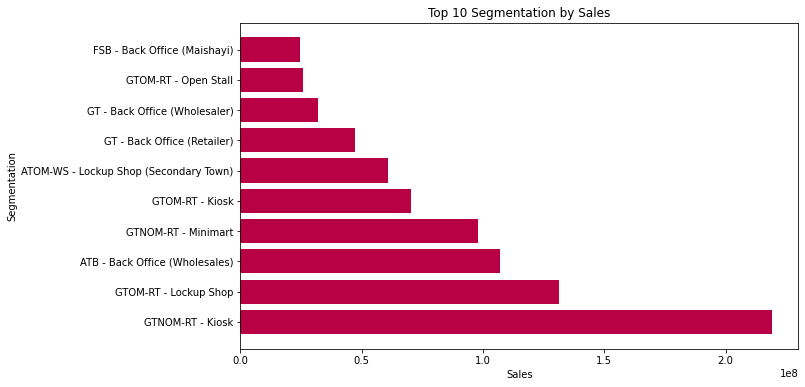

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(tops_10.index, tops_10['Sales'],color='#b80045')
plt.xlabel('Sales')
plt.ylabel('Segmentation')
plt.title('Top 10 Segmentation by Sales')
#plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()
#plt.savefig('graph.png')

In [50]:
#least 10 Segmentation
result = pd.DataFrame(df.groupby('Segmentation').sum()['Sales'])
SORT = result.sort_values('Sales', ascending=True)
#result
leasts_10 = SORT[:10]
leasts_10

,Sales
Segmentation,
MTNOM-RT - Supermarket,490.72
ATOM-RT - Open Stall (Periodic Market),449680.32
GTNOM-RT - Table Top,3722892.97
GTOM-WS - Lockup Shop,4425848.93
GOTH1 - GT - Others,5178256.13
FSBOTH1 - FSB-Others,7159604.93
GTNOM-RT - Neighborhood Store,13618957.28
ATNOM-RT - Neighborhood Store,14539125.48
GTOM-RT - Table Top,18717451.50


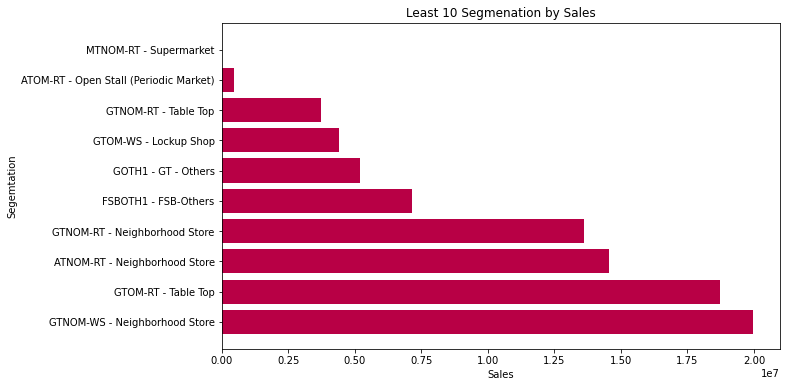

In [53]:
plt.figure(figsize=(10, 6))
plt.barh(leasts_10.index, leasts_10['Sales'],color='#b80045')
plt.xlabel('Sales')
plt.ylabel('Segemtation')
plt.title('Least 10 Segmenation by Sales')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
#plt.show()
#plt.savefig('graph.png')

# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages


In [1]:
import numpy as np
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\JOBEN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\JOBEN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df=pd.read_csv('sales data.csv', parse_dates = True)

In [3]:
df.head()

,Sales,MONTH
0,39696.0,JAN
1,5292.8,JAN
2,2646.4,JAN
3,3969.6,JAN
4,13232.0,JAN


In [4]:
df.tail()

,Sales,MONTH
139,441.04,DEC
140,330.78,DEC
141,441.04,DEC
142,441.04,DEC
143,330.78,DEC


In [5]:
df.set_index('MONTH',inplace=True)

##  Visualize the Data

<AxesSubplot:xlabel='MONTH'>

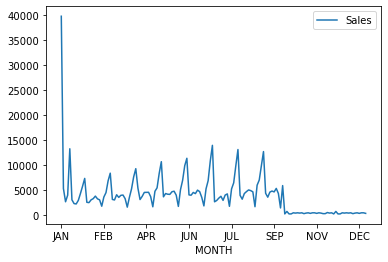

In [6]:
df.plot()

In [8]:
#training and test set
training = df.iloc[:-31,:]
test = df.iloc[-31:, :]


# CREATING THE SARIMA MODEL

In [9]:
#SARIMA model
model = auto_arima(y = training.Sales,
                   m = 7)

In [10]:
#Predictions
predictions = pd.Series(model.predict(n_periods = len(test)))
predictions.index = test.index
#predictions[:4]

C:\Users\JOBEN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='MONTH'>

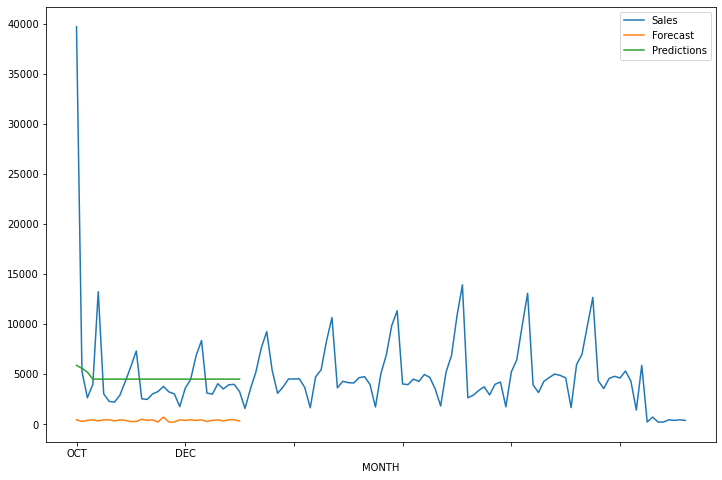

In [11]:
# Visualization
training['Sales'].plot(figsize=(12, 8), legend=True, label='Sales')
test['Sales'].plot(legend=True, label='Forecast')
predictions.plot(legend=True, label='Predictions')

# ARIMA MODEL RESULTS

In [12]:
from statsmodels.tsa.arima_model import ARIMA

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(df['Sales'], order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Get summary information
print(model_fit.summary())

C:\Users\JOBEN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\JOBEN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\JOBEN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\JOBEN\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\JOBEN\anaconda3\lib\site-pack

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1345.105
Date:                Tue, 26 Sep 2023   AIC                           2696.211
Time:                        14:41:45   BIC                           2705.099
Sample:                             0   HQIC                          2699.823
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2346      0.042      5.605      0.000       0.153       0.317
ma.L1         -0.8768      0.065    -13.537      0.000      -1.004      -0.750
sigma2      8.946e+06   1.25e-09   7.13e+15      0.0